# ID-  AI-19

INTRODUCTION

I used different pretrained model to predict dog breed. But here I show the best accuracy pre trained model.

I import all necessary library and classes.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten

import os
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import cv2

Using TensorFlow backend.


I just read the labels.csv file there contain unique number of every image and their breed.

In [2]:
df_train = pd.read_csv('C:\\Users\\Dr. farid\\Desktop\\shihab Litu\\kaggle Assignment\\Dog\\labels.csv')
df_test = pd.read_csv('C:\\Users\\Dr. farid\\Desktop\\shihab Litu\\kaggle Assignment\\Dog\\sample_submission.csv')

In [3]:
df_train.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


After making series type we encode the breed of dog.

then we use sparse matrix to remove 0 value in dataframe which makes our memory free and 
process will be faster,

In [4]:
targets_series = pd.Series(df_train['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)

In [5]:
one_hot_labels = np.asarray(one_hot)

define image size 90*90 and create three empty list which will be fill up by calculation.

In [6]:
im_size = 90
x_train = []
y_train = []
x_test = []

I use for loop to read every image and their breed. Here I use openCV version 2.

Then I resize the image and insert into empty list of previous cell.

In [7]:
i = 0 
for f, breed in tqdm(df_train.values):
    img = cv2.imread('C:\\Users\\Dr. farid\\Desktop\\shihab Litu\\kaggle Assignment\\Dog\\train\\{}.jpg'.format(f))
    label = one_hot_labels[i]
    x_train.append(cv2.resize(img, (im_size, im_size)))
    y_train.append(label)
    i += 1

100%|████████████████████████████████████████████████████████████████████████████| 10222/10222 [04:24<00:00, 38.63it/s]


In [8]:
for f in tqdm(df_test['id'].values):
    img = cv2.imread('C:\\Users\\Dr. farid\\Desktop\\shihab Litu\\kaggle Assignment\\Dog\\test\\{}.jpg'.format(f))
    x_test.append(cv2.resize(img, (im_size, im_size)))

100%|████████████████████████████████████████████████████████████████████████████| 10357/10357 [04:25<00:00, 39.00it/s]


Normalized the data divide by 255 and check the shape.

In [9]:
y_train_raw = np.array(y_train, np.uint8)
x_train_raw = np.array(x_train, np.float32) / 255.
x_test  = np.array(x_test, np.float32) / 255.
print(x_train_raw.shape)
print(y_train_raw.shape)
print(x_test.shape)

(10222, 90, 90, 3)
(10222, 120)
(10357, 90, 90, 3)


In [10]:
num_class = y_train_raw.shape[1]

In [11]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw, y_train_raw, test_size=0.3, random_state=1)

Transfer Learning Model : I use VGG19 for best result.

import the weight.

In [12]:
base_model = VGG19( weights='imagenet', include_top=False, input_shape=(im_size, im_size, 3))

14344192/80134624 [====>.........................] - ETA: 1:21:3 - ETA: 40:49  - ETA: 33:1 - ETA: 22:4 - ETA: 18:5 - ETA: 14:2 - ETA: 11:3 - ETA: 11:3 - ETA: 9:5 - ETA: 9: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6

80142336/80134624 [==============================] - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29

In [13]:
# Add a new top layer 
#vgg19
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_class, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 90, 90, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 90, 90, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 90, 90, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 45, 45, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 45, 45, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 45, 45, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 22, 22, 128)       0         
__________

In [ ]:
model.fit(X_train, Y_train, epochs=1, validation_data=(X_valid, Y_valid), verbose=1)

In [ ]:
prediction = model.predict(x_test, verbose=1)

In [ ]:
output = pd.DataFrame(prediction)
# Set column names to those generated by the one-hot encoding earlier
col_names = one_hot.columns.values
output.columns = col_names
# Insert the column id from the sample_submission at the start of the data frame
output.insert(0, 'id', df_test['id'])
output.head(5)

In [ ]:
output.to_csv('submission.csv', index=False)

Conclusion

I use VGG19 model and bottleneck feature. My best accuracy is 4.0204 when I use 5 epoch.
I have tried different epoch to increase accuracy. First I have tried 1 epoch, the accuracy was 4.28582. That time I feel that if I increase epoch number accuracy will be increase. So I have tried 18 epoch last time. But I am frustrated this time. This time accuracy was 4.43315. May be overfitting was occured.

Considering all of this epoch number I saw that I get good result when I use 5 epoch number. 

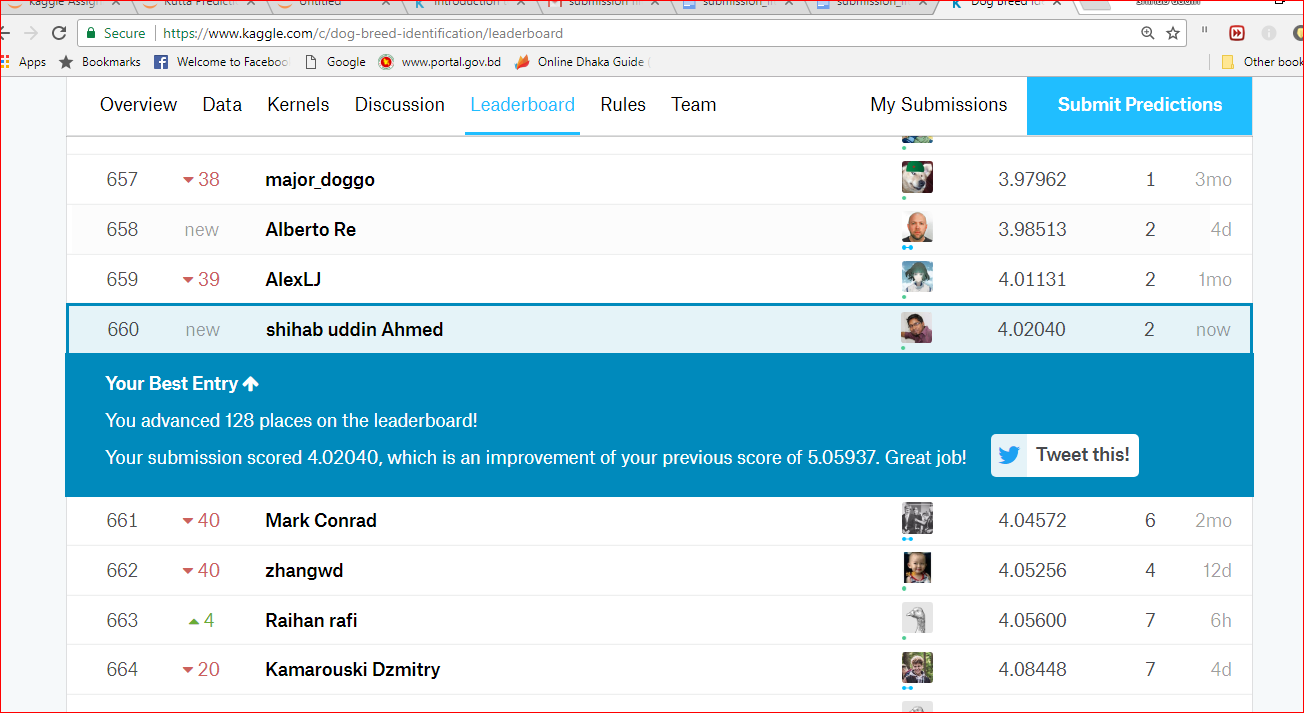

In [2]:
from IPython.display import Image
Image('dog_5epoch.PNG')